In [33]:
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
from PIL import Image
import tifffile

In [25]:
imgM3=tifffile.imread('HA1_M3_liver_10X_comb.tif')
imgM1=tifffile.imread('HA1_M1_liver_10X_comb.tif')

In [21]:
import glob

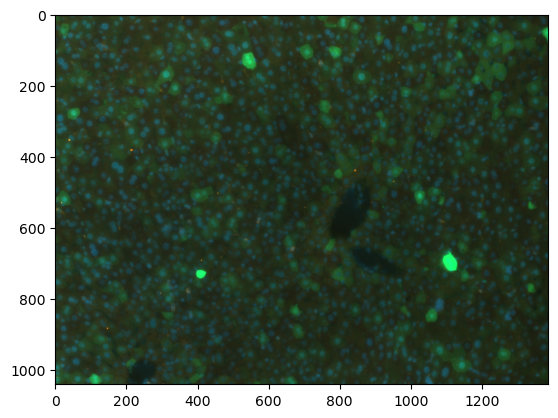

In [26]:
plt.imshow(imgM3)

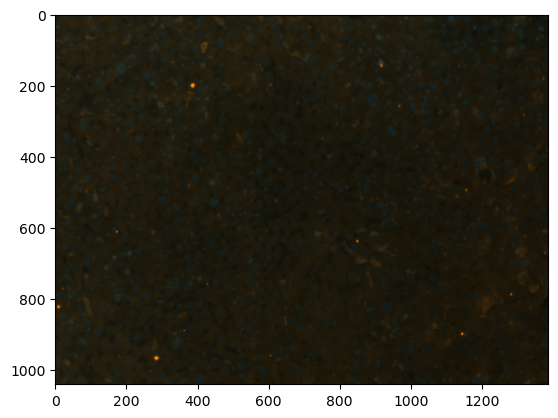

In [27]:
plt.imshow(imgM1)

In [44]:
#imgM3_2 = np.moveaxis(np.array(imgM3),0,2)
#row,column,color
imgM3.shape

(1040, 1388, 3)

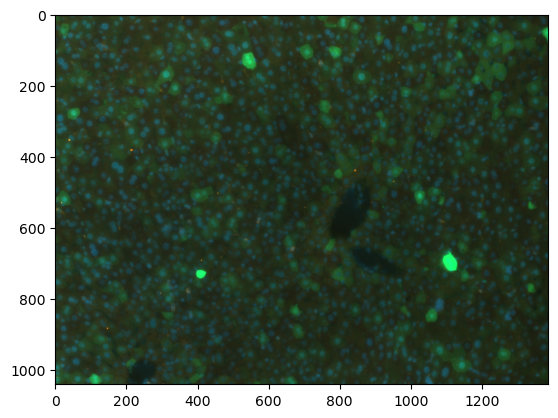

In [46]:
plt.imshow(np.array(imgM3))

In [60]:
imgdf=pd.DataFrame(imgM3[:,:,2])
print(imgdf.shape)
imgdf.head(20)

(1040, 1388)


,0,1,2,3,4,5,6,7,8,9,...,1378,1379,1380,1381,1382,1383,1384,1385,1386,1387
0,32,33,32,31,31,31,31,31,33,31,...,21,22,21,22,21,22,25,25,25,24
1,37,35,36,33,33,35,34,34,34,34,...,20,21,21,23,22,22,23,24,24,24
2,37,37,37,37,37,37,37,36,35,34,...,20,20,19,20,22,21,22,24,26,25
3,42,41,42,39,38,38,38,38,37,35,...,20,20,20,21,22,21,23,25,26,25
4,41,41,42,41,40,39,38,39,37,36,...,19,21,21,21,22,23,23,24,25,25
5,43,40,43,41,40,40,39,39,38,36,...,21,20,19,20,22,23,23,24,25,23
6,44,41,40,42,42,40,40,39,38,37,...,20,21,21,20,21,22,22,25,23,24
7,42,41,41,42,42,40,41,40,40,38,...,20,20,20,21,19,23,23,24,25,24
8,42,41,43,43,43,43,42,40,40,40,...,21,21,21,21,20,22,22,23,24,25
9,44,46,45,45,45,44,42,42,41,42,...,22,22,21,21,20,22,24,22,23,25


In [61]:
#use describe to get stats on each image"column" of pixels 
imgdf.describe()

,0,1,2,3,4,5,6,7,8,9,...,1378,1379,1380,1381,1382,1383,1384,1385,1386,1387
count,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,...,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000
mean,44.798077,44.830769,44.910577,44.554808,44.137500,43.991346,44.344231,44.421154,44.193269,44.398077,...,27.215385,27.361538,27.354808,27.228846,27.166346,27.311538,27.495192,27.729808,28.009615,28.170192
std,17.601120,18.443792,19.027681,18.592714,18.210864,18.421253,19.494249,19.882173,19.537140,20.151238,...,13.324836,14.197563,14.861830,15.222746,15.655649,16.328529,16.733142,17.173661,17.507043,17.673405
min,26.000000,25.000000,24.000000,24.000000,23.000000,24.000000,24.000000,23.000000,23.000000,22.000000,...,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
25%,32.000000,32.000000,32.000000,32.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,18.000000,18.000000,18.000000
50%,38.000000,38.000000,37.000000,37.000000,37.000000,37.000000,36.000000,36.000000,36.000000,36.000000,...,22.000000,22.000000,22.000000,21.000000,21.000000,21.000000,21.000000,21.000000,22.000000,22.000000
75%,51.000000,51.000000,50.000000,50.250000,50.000000,50.000000,51.000000,51.000000,50.000000,50.250000,...,29.000000,30.000000,29.000000,29.000000,28.000000,27.000000,27.000000,27.250000,28.000000,29.000000
max,107.000000,124.000000,138.000000,119.000000,119.000000,129.000000,133.000000,127.000000,116.000000,141.000000,...,88.000000,96.000000,110.000000,115.000000,117.000000,120.000000,115.000000,119.000000,120.000000,117.000000


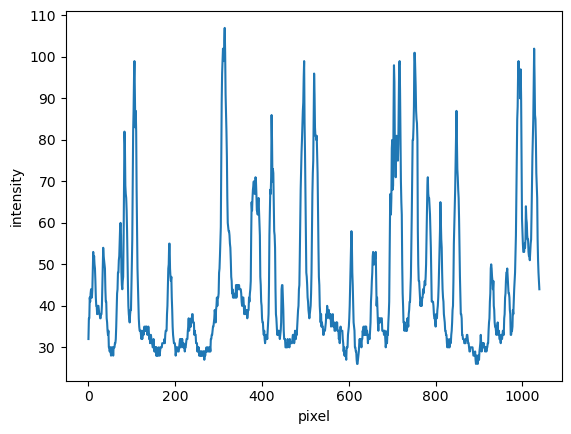

In [62]:
#plot intesntities in the first column
plt.plot(imgdf[0])
plt.xlabel('pixel')
plt.ylabel('intensity')
plt.show()

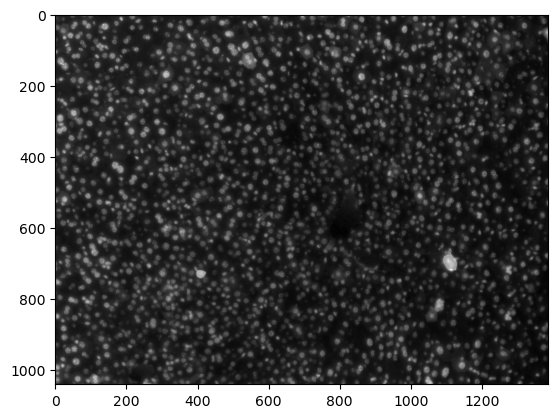

In [63]:
plt.imshow(imgdf,cmap='gray')

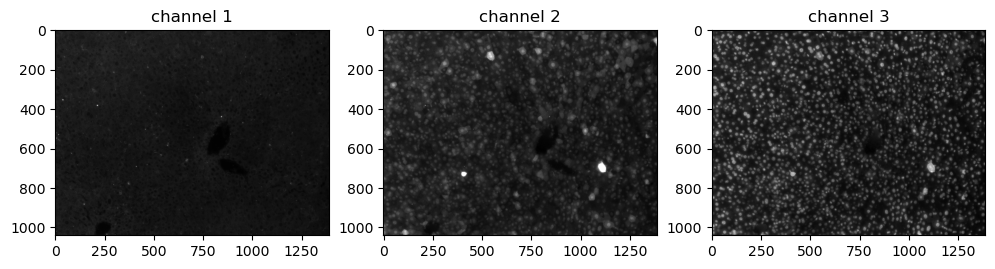

In [64]:
#start by making our figure a bit bigger so it's easier to see
plt.figure(figsize=(12,4))
#the subplot command let's us specify the dimensions of our plotting grid: here we have 1 row and 3 columns
ax=plt.subplot(1,3,1)
#ax is an axes object, we can use similar commands to the plt object
ax.imshow(imgM3[:,:,0],cmap='gray')
ax.set_title('channel 1')
ax=plt.subplot(1,3,2)
ax.imshow(imgM3[:,:,1],cmap='gray')
ax.set_title('channel 2')
ax=plt.subplot(1,3,3)
ax.imshow(imgM3[:,:,2],cmap='gray')
ax.set_title('channel 3')
plt.show()

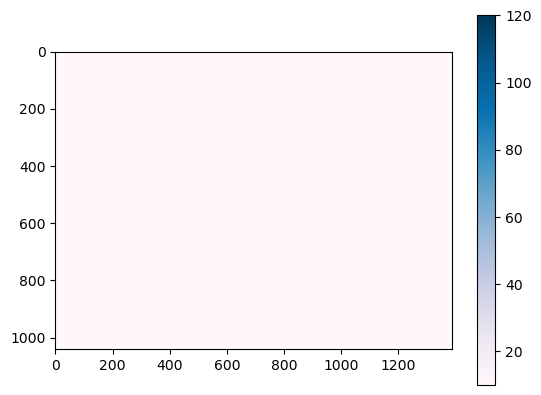

In [83]:
plt.imshow(imgM3[:,:,2]>200,cmap='PuBu',vmin=10,vmax=120)
plt.colorbar()

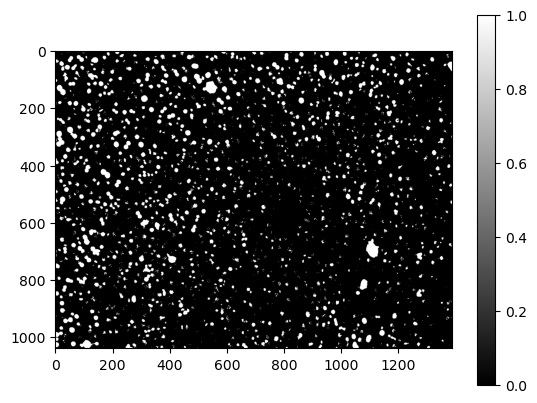

In [94]:
plt.imshow(imgM3[:,:,2]>60,cmap='gray')
plt.colorbar()

In [100]:
#count the number of pixels above our threshold to get our number of cells
bwdf=imgdf>60
bwdf.head()

,0,1,2,3,4,5,6,7,8,9,...,1378,1379,1380,1381,1382,1383,1384,1385,1386,1387
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [96]:
#sum everythign up to get the area
countwhite=bwdf.sum().sum()
countwhite

np.int64(123616)

In [97]:
total_pixels=bwdf.shape[0]*bwdf.shape[1]
total_pixels

1443520

In [98]:
countwhite/total_pixels

np.float64(0.08563511416537353)